**Workshop**

จงหาสัญญาณซื้อขาย RSI 14 วัน ของหุ้น NVDA โดยดึงข้อมูล Nvidia ในระดับ Daily โดยคำนวนจากสูตร RSI

<img src='https://www.tradingwithrayner.com/wp-content/uploads/2020/02/The-truth-about-RSI-1.jpg'>

## Import Libraries

In [1]:
## Import Libraries
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf

## Import Dataset

In [54]:
# define stock and date
ticker_name = 'NVDA'
start='2020-01-01' 
end='2021-01-01'

In [116]:
raw_df = yf.download(tickers=ticker_name, start=start, end=end)
raw_df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.770550,23753600
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.813869,20538400
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.060509,26263600
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.775536,31485600
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.887646,27710800
...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,129.702820,9788400
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.767029,21256400
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198730,17037200


In [117]:
def create_rsi(df, days=14):
    chg = df['Close'].diff()
    chg.dropna(inplace=True)

    chg_up = chg.where(chg > 0, 0)
    chg_down = chg.where(chg < 0, 0)
    # chg_up = chg.mask(chg < 0,0)
    # chg_down = chg.mask(chg > 0, 0)

    avg_up = chg_up.rolling(days).mean()
    avg_down = chg_down.rolling(days).mean().abs()
    rsi = avg_up / avg_down
    rsi = 100 - (100/(1+rsi))
    df['rsi'] = rsi
    
    return df

In [118]:
df = create_rsi(raw_df)
df

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2020-01-02,59.687500,59.977501,59.180000,59.977501,59.770550,23753600,NaN
2020-01-03,58.775002,59.457500,58.525002,59.017502,58.813869,20538400,NaN
2020-01-06,58.080002,59.317501,57.817501,59.264999,59.060509,26263600,NaN
2020-01-07,59.549999,60.442501,59.097500,59.982498,59.775536,31485600,NaN
2020-01-08,59.939999,60.509998,59.537498,60.095001,59.887646,27710800,NaN
...,...,...,...,...,...,...,...
2020-12-24,130.372498,131.324997,129.387497,129.937500,129.702820,9788400,34.651973
2020-12-28,130.625000,130.625000,127.632500,129.000000,128.767029,21256400,31.245840
2020-12-29,129.250000,130.725006,128.422501,129.432495,129.198730,17037200,37.827300


In [119]:
# create signal
df.loc[df['rsi'] > 70, 'action'] = 'sell'
df.loc[df['rsi'] < 30, 'action'] = 'buy'

# create marker signal
df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] * 0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] * 1.02

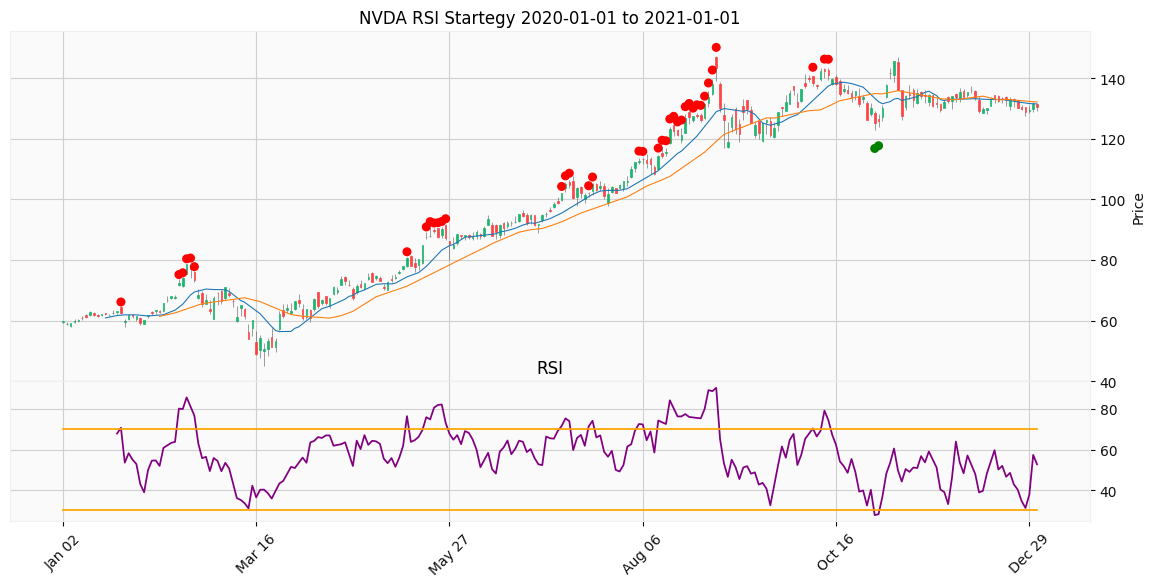

In [134]:
df['lower'] = 30
df['upper'] = 70

# define rsi plot
rsi = mpf.make_addplot(df['rsi'],color='purple', panel=1, title="RSI")
rsi_lower = mpf.make_addplot(df['lower'], panel = 1, color='orange')
rsi_upper = mpf.make_addplot(df['upper'], panel = 1, color='orange')

# define signal plot and color condition to marker
color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
signal = mpf.make_addplot(raw_df['marker_position'], type='scatter', markersize= 30, color=color_marker)

# added plot
addedplot = [rsi, signal, rsi_lower, rsi_upper]

mpf.plot(   df, style='yahoo', type='candle', mav=(12, 26), addplot=addedplot,figsize=(15, 7),
            axtitle=f'{ticker_name} RSI Startegy {start} to {end}')